In [3]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('asm.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,mlp17
1,0,1,338.124817,308.649231,279.351261,157.656418,396.898373,459.642044,0,409.881988,...,176.115577,425.699604,203.980340,Up_right,0,78.968729,881.508223,138.619456,0,mlp10
2,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,mlp17
3,1,1,338.274475,308.534027,279.539314,157.674393,397.009636,459.393662,0,409.638031,...,176.050999,425.668627,203.878841,Up_right,0,94.675906,892.193796,138.388548,0,mlp10
4,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,mlp17


In [5]:
len(df)

12652

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12652 entries, 0 to 12651
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              12652 non-null  int64  
 1   N_Person           12652 non-null  int64  
 2   Xcenter            12652 non-null  float64
 3   Ycenter            12652 non-null  float64
 4   PerXmin            12652 non-null  float64
 5   PerYmin            12652 non-null  float64
 6   PerXmax            12652 non-null  float64
 7   PerYmax            12652 non-null  float64
 8   N_Handgun          12652 non-null  int64  
 9   HgXcenter          12652 non-null  float64
 10  HgYcenter          12652 non-null  float64
 11  HgXmin             12652 non-null  float64
 12  HgYmin             12652 non-null  float64
 13  HgXmax             12652 non-null  float64
 14  HgYmax             12652 non-null  float64
 15  Intersection       12652 non-null  object 
 16  Included_Center    126

In [7]:
df.nunique()

Frame                 1689
N_Person                 5
Xcenter               8978
Ycenter               8962
PerXmin               8983
PerYmin               8979
PerXmax               8982
PerYmax               8970
N_Handgun                5
HgXcenter             4329
HgYcenter             4327
HgXmin                4331
HgYmin                4331
HgXmax                4331
HgYmax                4330
Intersection             9
Included_Center          2
Intersection_Area     5511
Hg_Area               4331
Distance             12652
Ground_Truth             4
GT                       4
dtype: int64

In [8]:
df['Ground_Truth'].value_counts()

0    11400
1     1198
3       44
2       10
Name: Ground_Truth, dtype: int64

In [9]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,mlp17,1,0,0,0,0,0,0,0,0
1,0,1,338.124817,308.649231,279.351261,157.656418,396.898373,459.642044,0,409.881988,...,mlp10,0,0,0,0,0,0,0,0,1
2,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,mlp17,1,0,0,0,0,0,0,0,0
3,1,1,338.274475,308.534027,279.539314,157.674393,397.009636,459.393662,0,409.638031,...,mlp10,0,0,0,0,0,0,0,0,1
4,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,mlp17,1,0,0,0,0,0,0,0,0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12652 entries, 0 to 12651
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         12652 non-null  int64  
 1   N_Person                      12652 non-null  int64  
 2   Xcenter                       12652 non-null  float64
 3   Ycenter                       12652 non-null  float64
 4   PerXmin                       12652 non-null  float64
 5   PerYmin                       12652 non-null  float64
 6   PerXmax                       12652 non-null  float64
 7   PerYmax                       12652 non-null  float64
 8   N_Handgun                     12652 non-null  int64  
 9   HgXcenter                     12652 non-null  float64
 10  HgYcenter                     12652 non-null  float64
 11  HgXmin                        12652 non-null  float64
 12  HgYmin                        12652 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [11]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'mlp17', 0: 'mlp10', 3: 'rfc12', 2: 'rfc11'}


In [12]:
print(df2['Ground_Truth'].value_counts())

0    11400
1     1198
3       44
2       10
Name: Ground_Truth, dtype: int64


In [13]:
df3 = df2.drop(columns=["GT"])

In [14]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train_rfc, y_train_rfc = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test_rfc, y_test_rfc = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train_rfc.shape, y_train_rfc.shape)
print(X_test_rfc.shape, y_test_rfc.shape)

(10121, 28) (10121,)
(2531, 28) (2531,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

rfc_o = RandomForestClassifier(n_estimators=10, max_depth=7)
scores = pd.DataFrame(cross_validate(rfc_o, X_train_rfc, y_train_rfc, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

C:\ProgramData\Anaconda3\envs\entornoGPU\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,


mean_train =  0.9596878009861823
mean_test =  0.9510915411898286


,fit_time,score_time,test_score,train_score
0,0.097749,0.003954,0.953603,0.961792
1,0.099704,0.002992,0.961462,0.962674
2,0.100738,0.002991,0.948617,0.961796
3,0.105716,0.003020,0.944664,0.956966
4,0.093748,0.002992,0.943676,0.959820
5,0.103750,0.002997,0.951581,0.956087
6,0.103723,0.002992,0.945652,0.952904
7,0.095746,0.002992,0.957510,0.961028
8,0.105691,0.003990,0.954545,0.961686
9,0.092754,0.002990,0.949605,0.962125


                         feature  importance       std
25        Intersection_Up_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
20     Intersection_Center_right    0.000484  0.000762
27         Intersection_Up_right    0.001676  0.003089
1                       N_Person    0.002664  0.005600
23           Intersection_Inside    0.003111  0.005547
8                      N_Handgun    0.017744  0.024175
12                        HgYmin    0.023104  0.023439
17                       Hg_Area    0.023177  0.022567
5                        PerYmin    0.024323  0.023749
13                        HgXmax    0.027047  0.025523
19      Intersection_Center_left    0.027080  0.044834
3                        Ycenter    0.028511  0.033334
9                      HgXcenter    0.038265  0.029044
10                     HgYcenter    0.044751  0.053880
11        

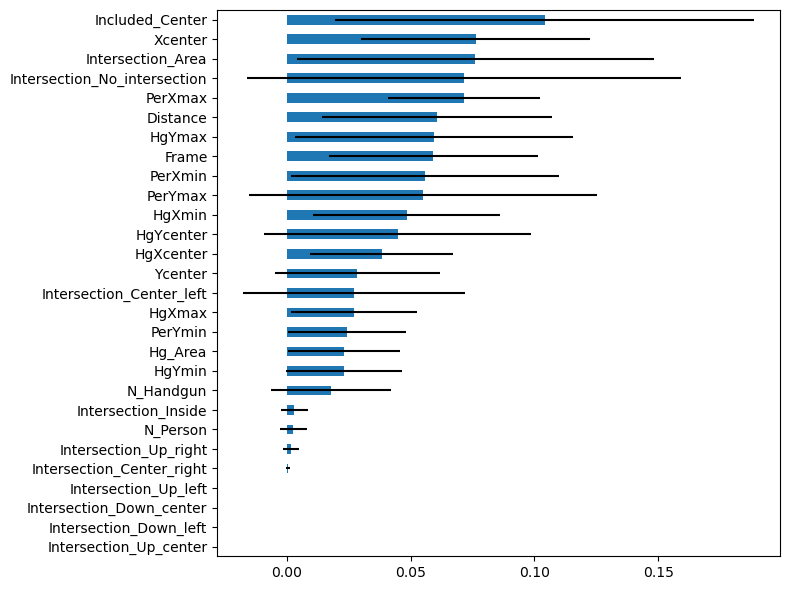

In [16]:
rfc_o.fit(X_train_rfc.values, y_train_rfc.values)
predictions_rfc_o=rfc_o.predict(X_test_rfc.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = rfc_o.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_o.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train_rfc.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test_rfc,predictions_rfc_o))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2305
           1       0.92      0.58      0.71       219
           2       0.00      0.00      0.00         1
           3       0.80      0.67      0.73         6

    accuracy                           0.96      2531
   macro avg       0.67      0.56      0.60      2531
weighted avg       0.96      0.96      0.95      2531



C:\ProgramData\Anaconda3\envs\entornoGPU\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\entornoGPU\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\entornoGPU\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# save the model to disk
filename = 'rfc_model_intersection6.sav'
pickle.dump(rfc_o, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [18]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-2.0489514 , -1.11274597,  0.33989488, -2.1566782 ,  0.3701992 ,
        -1.65103893,  0.29602604, -3.20232235, -0.57607603,  0.56213314,
        -2.34052204,  0.61447809, -2.12081703,  0.50958857, -2.5573473 ,
         1.26811752, -0.06463069, -0.5915216 , -0.64579167,  2.32439971,
        -0.27056207, -0.02352825, -0.01257389, -0.43421103, -1.13193808,
        -0.1451333 , -0.07296436, -0.17186801],
       [-2.0489514 , -0.06038672, -0.29356253, -2.17562215, -0.16515593,
        -1.63665292, -0.40446314, -3.34777465, -0.57607603,  0.56213314,
        -2.34052204,  0.61447809, -2.12081703,  0.50958857, -2.5573473 ,
        -0.78857045, -0.46587968, -0.5915216 , -0.62883701, -0.4302186 ,
        -0.27056207, -0.02352825, -0.01257389, -0.43421103, -1.13193808,
        -0.1451333 , -0.07296436,  5.81841856],
       [-2.04669759, -1.11274597,  0.33961438, -2.15585409,  0.36920283,
        -1.6488704 ,  0.29644675, -3.20734341, -0.57607603,  0.56068317,
        -2.3416668 ,  0.6117

In [20]:
print(scaler.mean_)

[9.09106623e+02 1.05738223e+00 4.01556492e+02 4.15881999e+02
 3.15145035e+02 3.00285205e+02 4.87967948e+02 5.31478794e+02
 3.87211508e-01 3.15303209e+02 3.59825385e+02 2.92086914e+02
 3.39647453e+02 3.38519504e+02 3.80003317e+02 3.83417641e-01
 9.68300700e+02 2.15281262e+03 2.31289485e+02 1.56180841e-01
 6.82105596e-02 5.53272210e-04 1.58077774e-04 1.58631046e-01
 5.61650332e-01 2.06291495e-02 5.29560544e-03 2.86911160e-02]


In [21]:
print(scaler.scale_)

[4.43693600e+02 9.50245842e-01 2.16075512e+02 4.92883235e+01
 2.16727143e+02 8.71466305e+01 2.25161619e+02 2.14580602e+01
 6.72153476e-01 1.68249783e+02 7.25382729e+01 1.65957845e+02
 7.71079606e+01 1.71079386e+02 6.88302982e+01 4.86218627e-01
 1.90893059e+03 2.14921043e+03 1.47367328e+02 3.63026701e-01
 2.52106880e-01 2.35152312e-02 1.25719046e-02 3.65331682e-01
 4.96184680e-01 1.42139325e-01 7.25779719e-02 1.66936922e-01]


In [22]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [23]:
X_train.shape

(9489, 28)

In [24]:
y_train.value_counts()

0    8550
1     899
3      33
2       7
Name: Ground_Truth, dtype: int64

In [25]:
X_test.shape

(3163, 28)

In [26]:
y_test.value_counts()

0    2850
1     299
3      11
2       3
Name: Ground_Truth, dtype: int64

In [27]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=123, tol=0.000000001)
mlp.fit(X_train,y_train)
predictions_mlp=mlp.predict_proba(X_test)
predictions_mlp

array([[9.99752963e-01, 2.46002328e-04, 2.51469015e-09, 1.03249255e-06],
       [1.00000000e+00, 1.86006275e-22, 1.25977477e-29, 1.61608650e-27],
       [1.00000000e+00, 1.60318816e-12, 6.79799473e-12, 7.44092598e-12],
       ...,
       [9.99996937e-01, 2.04863244e-06, 9.74036858e-07, 4.05388238e-08],
       [9.99999282e-01, 7.16322867e-07, 6.23853741e-11, 1.12233768e-09],
       [9.04107223e-01, 8.39344744e-02, 5.90104878e-04, 1.13681974e-02]])

In [28]:
predictions_mlp=mlp.predict(X_test)
predictions_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2850
           1       0.88      0.84      0.86       299
           2       0.00      0.00      0.00         3
           3       0.88      0.64      0.74        11

    accuracy                           0.97      3163
   macro avg       0.68      0.62      0.65      3163
weighted avg       0.97      0.97      0.97      3163



C:\ProgramData\Anaconda3\envs\entornoGPU\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\entornoGPU\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\envs\entornoGPU\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print("Score train = ",mlp.score(X_train, y_train))
print("Score test = ",mlp.score(X_test, y_test))

Score train =  0.983770681842133
Score test =  0.9724944672779007


In [35]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(mlp, open(filename, 'wb')) 